# QUALITY OF WINE PREDICTION

In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Read the dataset

data = pd.read_csv("E:\PYTHON.AMITY\winequality-red.csv", sep= ';')

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
#Print the unique values for each column

print("Unique values in each columns :")
for i in data.columns:
    print(i, data[i].unique())

Unique values in each columns :
fixed acidity [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
volatile acidity [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.6

In [9]:
#print the number of unique values in each column

print("The number of unique values in each column : ")

for i in data.columns:
    print(i,":", len(data[i].unique()))
    

The number of unique values in each column : 
fixed acidity : 96
volatile acidity : 143
citric acid : 80
residual sugar : 91
chlorides : 153
free sulfur dioxide : 60
total sulfur dioxide : 144
density : 436
pH : 89
sulphates : 96
alcohol : 65
quality : 6


In [10]:
#dimensions of the dataset

print("Dimension of the dataset :",format(data.shape))

Dimension of the dataset : (1599, 12)


In [11]:
#extracting features with NaN values

fea_NaN = [f for f in data.columns
           if data[f].isnull().sum() >= 1]
print("Features with NaN values:")
fea_NaN

Features with NaN values:


[]

In [12]:
#We can see that there are no null values or missing values in the dataset
#So now we will check the relationship between the features with the target variable 'quality'

In [13]:
#correlation of variables with the target variable 
data[data.columns[0:]].corr()['quality'][:]

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

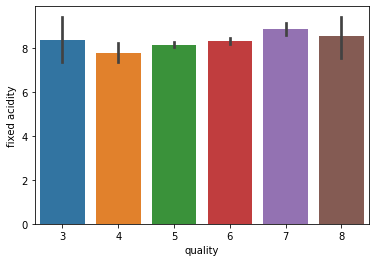

In [14]:
#there is not much difference or variablity of fixed acidity with the quality of wine
fig = plt.figure(figsize = (6,4))
sns.barplot(x='quality',y='fixed acidity',data= data)

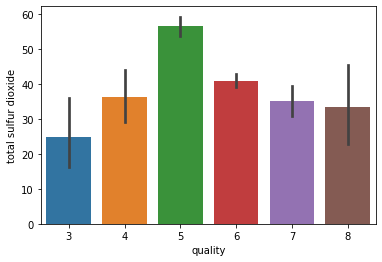

In [15]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'total sulfur dioxide',data = data )

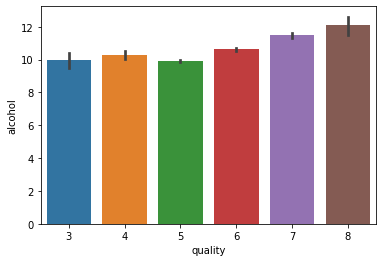

In [16]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x= 'quality', y= 'alcohol',data=data)

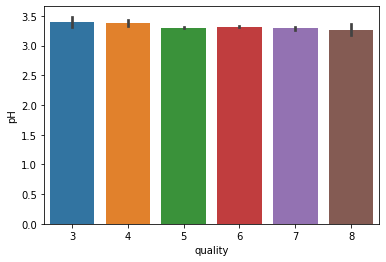

In [17]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x='quality',y='pH', data=data) #this graph shows that there is no effect of  pH in determining the quality of wine

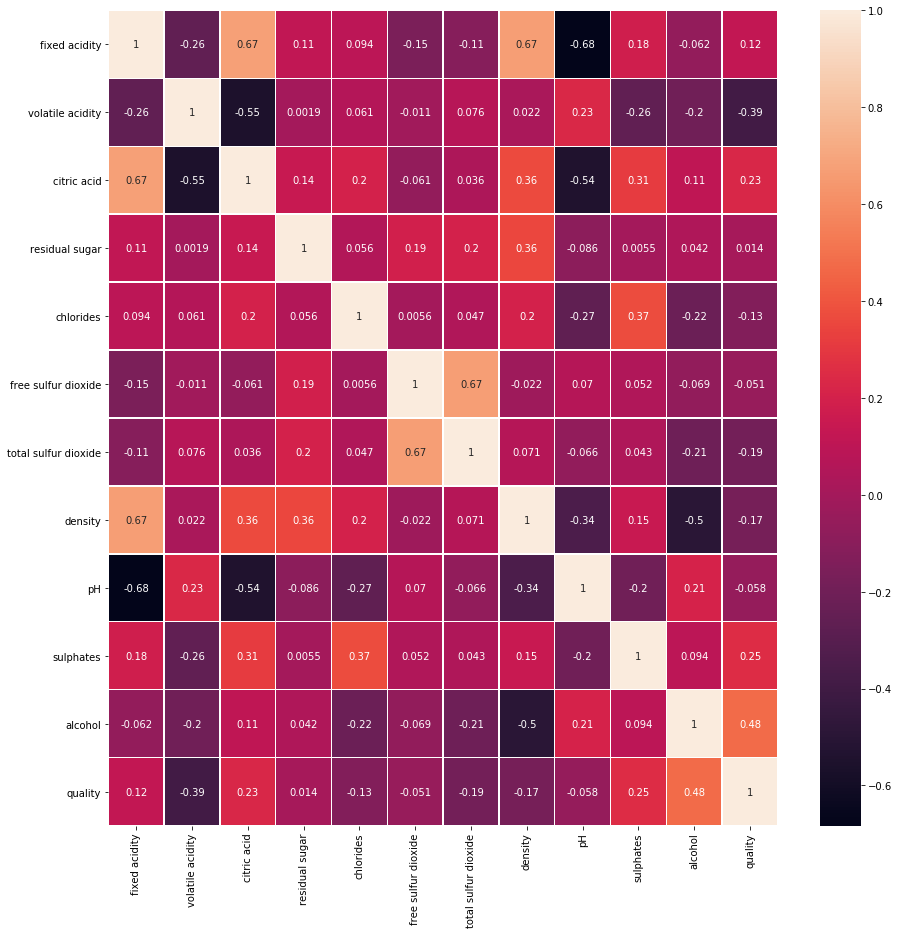

In [18]:
#plot heatmap
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(),annot = True, linewidth= 0.30)
plt.show()

In [19]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

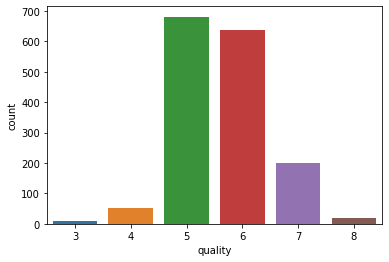

In [20]:
#taking a look at the quality ranges
sns.countplot(x='quality', data=data)

In [21]:
# splitting wine into good and bad groups, we're saying here that wines that have a quality score between
# 2-6.5 are "bad" quality, and wines that are  between 6.5 - 8 are "good"
bins = (2, 6.5, 8)
grp_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = grp_names)

In [23]:
# however "bad" and "good" aren't good naming conventions for a model to read in, so we're going to 
# assign a numeric label for this value. 
#LabelEncoder() will be used

# Assigning a label to our quality variable

from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()


# Now changing the dataframe to reflect on new label
data['quality'] = label_quality.fit_transform(data['quality'])

In [24]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [27]:
#Splitting training and testing data

from sklearn.model_selection import train_test_split

X = data.drop('quality', axis = 1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

In [29]:
# Now we will apply standard scaling
# standard scaling allows us to normalize all of the data such 
# that the distribution will have a mean value of 0 and a standard deviation of 1
# this step is useful when we want to compare data that corresponds to different units

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [44]:
#Now we will use RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

Rf = RandomForestClassifier()
Rf.fit(X_train,y_train)
y_pred = Rf.predict(X_test)

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       458
           1       0.66      0.44      0.53        70

    accuracy                           0.90       528
   macro avg       0.79      0.70      0.74       528
weighted avg       0.88      0.90      0.89       528



In [50]:
#Now using Support Vector Machine

from sklearn import svm

sv = svm.SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       458
           1       0.61      0.31      0.42        70

    accuracy                           0.88       528
   macro avg       0.76      0.64      0.67       528
weighted avg       0.86      0.88      0.87       528



In [ ]:
# We can see that RandomForestClassifier has higher frequency than SVM.  